In [1]:
import pyspark
import numpy as np
import matplotlib.pyplot as plt

In [2]:

pyspark

<module 'pyspark' from 'C:\\Users\\hp\\Anaconda2\\envs\\temp1\\lib\\site-packages\\pyspark\\__init__.py'>

In [3]:
from pyspark import SparkContext

In [4]:
    
import pyspark
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext
from pyspark.sql import Row
from pyspark import SparkContext, SparkConf
from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType, StringType
import pyspark.sql.functions as F

from pyspark.sql.functions import monotonically_increasing_id 
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
import json

conf = SparkConf().setAppName('MyFirstStandaloneApp')
sc = SparkContext(conf=conf)


In [5]:
sqlContext = SQLContext(sc)

In [8]:
lines = sc.textFile('Structured_data2')
data = lines.map(lambda line: line.split(";"))


[['Scrap_date',
  'Scrap_time',
  'Country_from',
  'Country_to',
  'Flight_id',
  'Days',
  'Journey_time',
  'Airline1_There',
  'Airline1_Back',
  'Airline2_There',
  'Airline2_Back',
  'Price1_There',
  'Price1_Back',
  'Price2_There',
  'Price2_Back',
  'Depart_hour1_There',
  'Depart_hour1_Back',
  'Depart_hour2_There',
  'Depart_hour2_Back',
  'Depart_from1_There',
  'Depart_from1_Back',
  'Depart_from2_There',
  'Depart_from2_Back',
  'Arrival_hour1_There',
  'Arrival_hour1_Back',
  'Arrival_hour2_There',
  'Arrival_hour2_Back',
  'Arrive_to1_There',
  'Arrive_to1_Back',
  'Arrive_to2_There',
  'Arrive_to2_Back',
  'Full_Price']]

# Uwzględnij potem datę scrapowania !  

In [9]:
df = data.toDF(['Scrap_date','Scrap_time','Country_from','Country_to','Flight_id','Days','Journey_time','Airline1_There',\
                'Airline1_Back','Airline2_There','Airline2_Back','Price1_There','Price1_Back','Price2_There','Price2_Back',\
                'Depart_hour1_There','Depart_hour1_Back','Depart_hour2_There','Depart_hour2_Back','Depart_from1_There',\
                'Depart_from1_Back','Depart_from2_There','Depart_from2_Back','Arrival_hour1_There','Arrival_hour1_Back',\
                'Arrival_hour2_There','Arrival_hour2_Back','Arrive_to1_There','Arrive_to1_Back','Arrive_to2_There',\
                'Arrive_to2_Back','Full_Price'])
# df_to_model = df.select('Scrap_time','Country_from','Country_to','There_or_Back','Flight_date','Airline',\
#                'Price','Depart_hour','Depart_from','Arrival_hour','Arrive_to')

In [10]:
df_to_model = df.select('Country_from','Country_to','Days','Journey_time','Full_Price')

In [ ]:

df_to_model.show()

# Austria - Austria

In [11]:
pr1 = df_to_model.filter(df_to_model.Country_from =='Austria').filter(df_to_model.Country_to =='Austria').\
select('Days','Journey_time','Full_Price')

In [12]:
pr1 = pr1.select("*").withColumn("id", monotonically_increasing_id())

In [13]:
df_feat = pr1.select(*(pr1[c].cast("float").alias(c) for c in pr1.columns[:]))

In [27]:
df_test = df_feat.limit(100)
df_train =  df_feat.subtract(df_test)

In [96]:
df_train.show()

+-----+------------+----------+-----------+
| Days|Journey_time|Full_Price|         id|
+-----+------------+----------+-----------+
|111.0|         5.0|     72.67|        187|
|148.0|         5.0|     79.68|        244|
| 89.0|         7.0|     91.41|17179869268|
|172.0|         7.0|     94.09|25769804026|
| 31.0|         5.0|     44.02|34359738516|
|164.0|         4.0|     83.22|34359738533|
| 92.0|         5.0|     77.71|42949673156|
|279.0|         4.0|     84.22|42949673272|
|273.0|         4.0|     84.22|        513|
| 18.0|         4.0|     44.02| 8589934790|
|100.0|         7.0|     83.78| 8589934845|
|127.0|         7.0|    242.73|17179869347|
| 50.0|         4.0|     49.02|25769804128|
| 28.0|         5.0|      75.7|34359738467|
| 31.0|         7.0|     70.65|34359738476|
|164.0|         4.0|     83.22| 8589934880|
| 85.0|         4.0|     97.47| 8589934910|
|157.0|         4.0|     81.26|17179869434|
| 18.0|         7.0|    150.14|17179869557|
| 40.0|         5.0|     39.04|2

In [25]:
FEATURES_COL = ['Journey_time','Full_Price']

# przerobienie danych do algorytmu

In [28]:
vecAssembler = VectorAssembler(inputCols=FEATURES_COL, outputCol="features")
df_test = vecAssembler.transform(df_test).select('Days', 'features')

In [29]:
vecAssembler = VectorAssembler(inputCols=FEATURES_COL, outputCol="features")
df_kmeans = vecAssembler.transform(df_train).select('Days', 'features')
df_kmeans.show()

+-----+--------------------+
| Days|            features|
+-----+--------------------+
|108.0|[5.0,79.230003356...|
|119.0|        [5.0,215.25]|
| 14.0|[5.0,248.94000244...|
| 82.0|[4.0,97.470001220...|
| 94.0|[7.0,67.110000610...|
| 60.0|[7.0,38.099998474...|
|279.0|[4.0,84.220001220...|
|153.0|[5.0,230.71000671...|
|104.0|[4.0,74.180000305...|
|294.0|[4.0,84.220001220...|
|105.0|[7.0,250.71000671...|
|301.0|[4.0,84.220001220...|
|109.0|[5.0,81.760002136...|
|299.0|[4.0,84.220001220...|
|  9.0|[7.0,74.180000305...|
| 18.0|[8.0,82.519996643...|
|128.0|[4.0,80.230003356...|
| 45.0|[4.0,44.020000457...|
| 35.0|[5.0,49.020000457...|
|124.0|[7.0,80.230003356...|
+-----+--------------------+
only showing top 20 rows



## Sprawdzanie liczby grup

In [78]:
cost = np.zeros(20)
for k in range(2,20):
    kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol("features")
    model = kmeans.fit(df_kmeans.sample(False,0.1, seed=42))
    cost[k] = model.computeCost(df_kmeans)

Text(0, 0.5, 'cost')

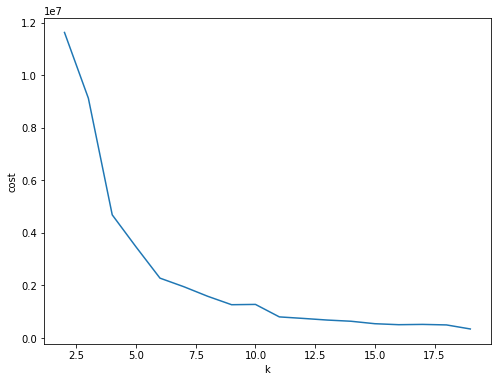

In [82]:
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,20),cost[2:20])
ax.set_xlabel('k')
ax.set_ylabel('cost')

In [30]:
k = 11
kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol("features")
model = kmeans.fit(df_kmeans)


In [31]:
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[ 6.59090909 98.19960993]
[ 6.26104418 38.78437742]
[  5.51851852 256.16370477]
[  6.70138889 141.54027949]
[ 5.68860759 78.55919027]
[ 6.13513514 54.63391917]
[  6.28409091 245.52954691]
[  6.31623932 171.67906267]
[ 5.97247706 72.34770763]
[  6.21428571 226.20571572]
[ 5.02745995 85.76535429]


In [32]:
transformed = model.transform(df_test).select('Days', 'prediction')
rows = transformed.collect()
print(rows[:3])

[Row(Days=147.0, prediction=0), Row(Days=1.0, prediction=8), Row(Days=97.0, prediction=8)]


In [33]:
df_pred = sqlContext.createDataFrame(rows)
df_pred.show()

+-----+----------+
| Days|prediction|
+-----+----------+
|147.0|         0|
|  1.0|         8|
| 97.0|         8|
|153.0|         4|
| 84.0|         0|
|274.0|         0|
|205.0|         3|
| 72.0|        10|
| 34.0|         6|
| 11.0|         5|
|278.0|        10|
| 38.0|         4|
|179.0|        10|
|109.0|         8|
|118.0|         9|
|  9.0|         8|
|171.0|        10|
|132.0|         4|
|113.0|         8|
|146.0|         8|
+-----+----------+
only showing top 20 rows



In [34]:
df_pred = df_pred.join(df_feat.limit(100), 'Days')

In [35]:
df_pred

DataFrame[Days: double, prediction: bigint, Journey_time: float, Full_Price: float, id: float]

In [59]:
df_pred = df_pred.toPandas()
#pddf_pred.reset_index().groupby('prediction').median()

In [62]:
list(df_pred.query('prediction==0').drop_duplicates("Days").Days)

[147.0, 84.0, 274.0, 81.0, 151.0, 67.0]

In [64]:
def pred_model(model, df_train, k):
    #model - wyliczony model
    #df_train - dataframe przerobiona na której robimy predict
    #k- liczba grup
    

    transformed = model.transform(df_train).select('Days', 'prediction')
    rows = transformed.collect()
    df_pred = sqlContext.createDataFrame(rows)
    df_pred = df_pred.toPandas()
    
    pred = []
    for i in range(k):
        
        pred.append(list(df_pred.query('prediction=='+str(i)).drop_duplicates("Days").Days))
    
    return pred


In [65]:
def pred_price(model, days, pred):
    price = 0 
    
    centers = model.clusterCenters()
    for i in range(len(pred)):
        if days in pred[i]:
            price = centers[i][1]
    return price

In [67]:
predicted = pred_model(model, df_kmeans, 11)

In [68]:
pred_price(model, 25, predicted)

[ 6.59090909 98.19960993]
[ 6.26104418 38.78437742]
[  5.51851852 256.16370477]
[  6.70138889 141.54027949]
[ 5.68860759 78.55919027]
[ 6.13513514 54.63391917]
[  6.28409091 245.52954691]
[  6.31623932 171.67906267]
[ 5.97247706 72.34770763]
[  6.21428571 226.20571572]
[ 5.02745995 85.76535429]


85.76535428743341

In [78]:
# df_test = df_feat.limit(100)
df_test.filter(df_test.Days ==25).select('Full_Price')[0]

TypeError: Invalid argument, not a string or column: 0 of type <class 'int'>. For column literals, use 'lit', 'array', 'struct' or 'create_map' function.

Text(0, 0.5, 'Journey_time')

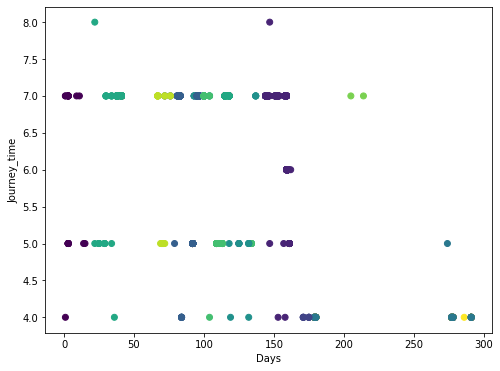

In [134]:
# threedee = plt.figure(figsize=(12,10))
# threedee.scatter(pddf_pred.Days, pddf_pred.Journey_time, c=pddf_pred.prediction)
# threedee.set_xlabel('Days')
# threedee.set_ylabel('Journey_time')
# plt.show()

fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.scatter(pddf_pred.Days, pddf_pred.Journey_time, c = pddf_pred.prediction)
ax.set_xlabel('Days')
ax.set_ylabel('Journey_time')

Text(0, 0.5, 'Full_Price')

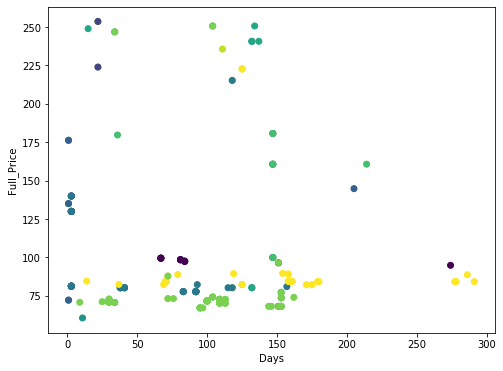

In [38]:
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.scatter(pddf_pred.Days, pddf_pred.reset_index().Full_Price, c = pddf_pred.prediction)
ax.set_xlabel('Days')
ax.set_ylabel('Full_Price')

Text(0, 0.5, 'Full_Price')

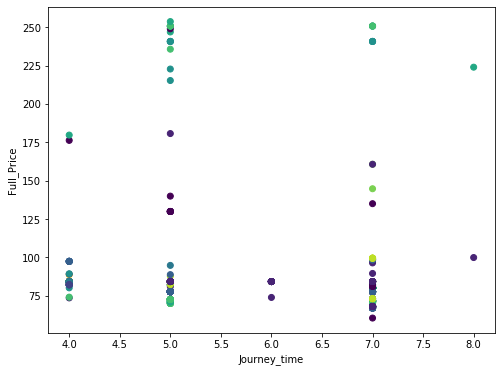

In [137]:
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.scatter(pddf_pred.Journey_time, pddf_pred.reset_index().Full_Price, c = pddf_pred.prediction)
ax.set_xlabel('Journey_time')
ax.set_ylabel('Full_Price')

In [23]:
flights

PythonRDD[31] at RDD at PythonRDD.scala:53

In [7]:
flightsRDD

2019-05-15.txt MapPartitionsRDD[3] at textFile at NativeMethodAccessorImpl.java:0